<a href="https://colab.research.google.com/github/juhumkwon/Data/blob/main/06_anomaly(local_outlier_factor_lo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

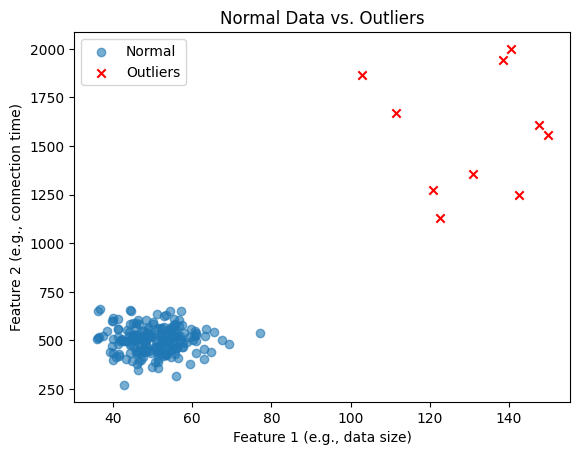

Detected Outliers:
     Connection Duration  Data Transferred  LOF Score
131            42.756486        270.807788  -3.882343
200           120.740975       1273.407072  -9.809714
201           102.818775       1864.722376 -12.747233
202           140.645050       1999.717673 -13.712617
203           149.831842       1555.431706 -10.857427
204           138.449371       1944.765730 -13.297454
205           142.482370       1247.348102 -10.285025
206           122.527207       1129.159415 -10.108518
207           147.702551       1606.174634 -11.149153
208           111.432140       1671.700684 -11.517975
209           130.906412       1358.162718  -9.706385


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# 샘플 네트워크 활동 데이터 생성
# Features: [Connection Duration, Data Transferred]
np.random.seed(42)

# 정상적인 네트워크 활동 데이터 (클러스터 형태)
normal_data = np.random.multivariate_normal([50, 500], [[50, 0], [0, 5000]], size=200)

# 이상치 데이터 추가 (비정상적인 활동)
outliers = np.random.uniform(
    low=[100, 1000],  # x = (100 ~ 150), y = (1000 ~ 2000)
    high=[150, 2000],
    size=(10, 2)      # 10개의 샘플생성
)

# 데이터 합치기
data = np.vstack([normal_data, outliers])
labels = np.array([1] * len(normal_data) + [-1] * len(outliers))  # 정상: 1, 이상치: -1

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["Connection Duration", "Data Transferred"])

# LOF 모델 생성 및 학습
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% 이상치 가정
predicted_labels = lof.fit_predict(data)

# 이상치 점수 저장
df["LOF Score"] = lof.negative_outlier_factor_

# 결과 시각화
"""
plt.figure(figsize=(10, 6))
plt.scatter(df["Connection Duration"], df["Data Transferred"],
            c=predicted_labels, cmap="coolwarm", edgecolor="k", s=60)
plt.title("Network Activity: Outlier Detection using LOF", fontsize=16)
plt.xlabel("Connection Duration", fontsize=12)
plt.ylabel("Data Transferred", fontsize=12)
plt.colorbar(label="LOF Label (1: Normal, -1: Outlier)")
plt.grid()
plt.show()
"""
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Normal', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', label='Outliers')
plt.legend()
plt.title("Normal Data vs. Outliers")
plt.xlabel("Feature 1 (e.g., data size)")
plt.ylabel("Feature 2 (e.g., connection time)")
plt.show()


# 이상치 출력
outliers_detected = df[predicted_labels == -1]
print("Detected Outliers:")
print(outliers_detected)
